<img src='./logo.png'>

**[time series]**
* ref: https://www.kaggle.com/c/bike-sharing-demand/overview

* 날짜 변환: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/  
df['Date'] = df['Date'].astype('datetime64[ns]')

In [317]:
# 분석
import pandas as pd
import numpy as np

# 경고
import warnings
warnings.filterwarnings(action='ignore')

# 날짜 가공
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# 데이터 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. PLOT에서 한글 처리 -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # - 기호 안 깨지게
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4 비율

import seaborn as sns
sns.set() # seaborn에서 회색 grid 깔아줌
sns.set(rc={'figure.figsize':(18, 5)}) # 결과 plot 크기 키워줌

In [318]:
# 사이킷런
from sklearn.model_selection import train_test_split

# 사이킷런 분류
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import LinearSVC

# 사이킷런 분류 점수
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# 						 # ---> y_true, y_pred
# from sklearn.metrics import precision_recall_curve # y_true, probas_pred
# from sklearn.metrics import roc_auc_score, roc_curve # y_true, y_score

# 분류 ensemble
# import xgboost as xgb
# from xgboost import plot_importance 
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier # lgb.쓰기 귀찮으니까 Classifier까지 import
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [319]:
# 사이킷런 회귀
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor


from sklearn.svm import SVC #linear SVC는 classifier 성 / SVC는 분류말고 회귀에도 쓸 수 있다.

from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# 사이킷런 회귀 점수
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score # squared=False로 하면 RMSE

In [320]:
# 사이킷런 스케일러
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 사이킷런 학습 데이터 증강
# StratifiedFold는 회귀에서는 X
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

# Data Load

In [321]:
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')
submit=pd.read_csv('./dataset/sampleSubmission.csv')

train, test 같이 가공하기
* train, test 합치고 분리
* train, test 복붙

In [322]:
train.shape

(10886, 12)

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [324]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [325]:
pd.crosstab(train['holiday'],train['workingday'])

workingday,0,1
holiday,,
0,3163,7412
1,311,0


# 날짜타입 변환
* astype : object --> datetime64[ns]
* read_csv : 날짜 타입으로 가져오기
* to_datetime()

## 방법 1 astype

In [326]:
# 방법 1
train['datetime']=train['datetime'].astype('datetime64[ns]')
# test['datetime']=test['datetime'].astype('datetime64[ns]')

## 방법 2 read_csv 자체에서

In [327]:
# 방법 2 -> read_csv API 읽어보기

# dtype 파라미터에서 dict로 dtype 지정 가능
# skiprows -> row 일부만
# nrows -> row 일부만
# na_values -> 결측이 어떤 문자로 써있니

# Datetime Handling 부분 참고
# parse_dates -> 여러 개 있으면 여러 개 리스트로 지정
train=pd.read_csv('./dataset/train.csv', parse_dates=['datetime'])
test=pd.read_csv('./dataset/test.csv', parse_dates=['datetime'])

In [328]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## 방법 3 to_datetime

In [329]:
# 방법 3 to_datetime                                  # 2011-01-01 00:00:00
# train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [330]:
# train.head()

# 가공

### datetime 컬럼 이름 바꾸기

In [331]:
## datetime 여러개라 헷갈리므로 이름 바꾸자
train=train.rename(columns={'datetime':'regtime'})
test=test.rename(columns={'datetime':'regtime'})
train.head()

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 날짜시간 핸들링 -> import datetime as dt

In [332]:
## datetime에서 연월일시분초 빼오는 것 -> lec 10 주피터 참고

In [333]:
# 강사님 lec10 예제코드 확임

In [334]:
import datetime as dt  # 파이썬에 이미 내장됨------> datetime64[ns]에도 사용 가능

set_day = dt.date(2019, 3, 1)
print(set_day, type(set_day))
print( set_day.year ,  set_day.month, set_day.day )
#------------------------------------------------------------------
set_time = dt.time(15, 30, 45)
print(set_time, type(set_time))
print( set_time.hour ,  set_time.minute, set_time.second )
#------------------------------------------------------------------
set_dt = dt.datetime(2018, 10, 9, 10, 20, 0)
print(set_dt, type(set_dt))
print( set_dt.year ,  set_dt.month, set_dt.day )
print( set_dt.hour ,  set_dt.minute, set_dt.second )
#------------------------------------------------------------------
print(dt.date.today())
print(dt.datetime.now())
print("{:%Y-%m-%d %H:%M:%S}".format(dt.datetime.now()))


2019-03-01 <class 'datetime.date'>
2019 3 1
15:30:45 <class 'datetime.time'>
15 30 45
2018-10-09 10:20:00 <class 'datetime.datetime'>
2018 10 9
10 20 0
2022-02-03
2022-02-03 17:38:23.340095
2022-02-03 17:38:23


# 연/월/일/시/분/초 꺼내기

In [335]:
# 이제부터 PC는 가공해서 만든 피쳐(보통 PCA라고 하는데 이건 그거까지는 아니니까)

train['PC_y']=train['regtime'].dt.year
train['PC_m']=train['regtime'].dt.month
train['PC_d']=train['regtime'].dt.day
train['PC_h']=train['regtime'].dt.hour
train['PC_w']=train['regtime'].dt.dayofweek # 0: 월 ~ 6:일
# train['PC_w']=train['regtime'].dt.dayofweek # 주차: credit_d_v5 확인
train.head() # 2011-01-01 00:00:00	1	0	0	1	9.84	14.395	81	0.0	3	13	16	2011	1	1	0	5(토요일)
train.tail(2) # 2012-12-19 23:00:00	4	0	1	1	13.12	16.665	66	8.9981	4	84	88	2012	12	19	23	2(수요일)


,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,PC_y,PC_m,PC_d,PC_h,PC_w
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,2


In [336]:
# import datetime as dt 
# from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY # 날짜 더하기 빼기 간단하게 하는 게 rrule

# now = dt.datetime.now()          # 오늘 날짜
# dt.timedelta(days=-1)            # 기준 날짜,시각 기점으로 n일/초/분/주 델타값을 지정. (- 하면 이전 +는 이후)

# old=now-dt.timedelta(days=365)

# rrule(freq=YEARLY, dtstart=old, until=now) # 그냥 하면 객체로 나온다.

# print([y for y in rrule(freq=YEARLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 연 별로 뭐뭐 있나?(본인 포함)

# print([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)])         # # 전년도와 올해 기준으로 주 별로 뭐뭐 있나?(본인 포함)

# print( len ([y for y in rrule(freq=YEARLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 년 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

# print( len ([y for y in rrule(freq=MONTHLY, dtstart=old, until=now)]) ) # 전년도와 올해 기준으로 몇 개월 있나? (단, 시작날 포함하므로 본인 제외할 거면 -1 하면 됨)

# print( len ([y for y in rrule(freq=WEEKLY, dtstart=old, until=now)]) )

## regtime 후처리

In [337]:
# 죽어도 안 쓸 거면 drop -> 나중에 필요해서 꺼내오려면 귀찮아짐
# train=train.drop('regtime', axis=1)

In [338]:
train.head(2)

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,PC_y,PC_m,PC_d,PC_h,PC_w
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5


* 피쳐 --> index로 넣기

In [339]:
# regtime을 인덱스로 보내버림
train=train.set_index('regtime') # 일반 컬럼을 index로 구겨넣음
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,PC_y,PC_m,PC_d,PC_h,PC_w
regtime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5


* index --> 피쳐로 꺼내기

In [340]:
# 다시 꺼내오려면? -> pandas.DataFrame.reset_index
# 인덱스를 0부터 다시 설정
# 기존에 인덱스 서로 다른 거 상하로 합칠 때 썼었다.
# DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
#                                 원래 index drop? -> drop=False면 컬럼 계속 늘어남

# train=train.reset_index()
# train.head()

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  PC_y        10886 non-null  int64  
 12  PC_m        10886 non-null  int64  
 13  PC_d        10886 non-null  int64  
 14  PC_h        10886 non-null  int64  
 15  PC_w        10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.4 MB


# 우선 점수 보기

object, 결측, datetime

In [342]:
# RF
model=RandomForestRegressor() # datetime은 인식 못 한다. (예전엔 object만 아니면 됐는데 지금은 안 됨)

X=train.drop('count', axis=1)
y=train['count']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=1024, shuffle=True)

model.fit(X_train, y_train)

pred=model.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE:{rmse:.4f} {model.__class__.__name__}")

RMSE:3.5647 RandomForestRegressor


# EDA -> 시계열이라 할 거 많다
* ref : https://seaborn.pydata.org/generated/seaborn.countplot.html
* ref : https://seaborn.pydata.org/generated/seaborn.barplot.html
* linechart : PC~관련피쳐
* barchart
* boxplot

countplot -> y 필요 없이 개수 센다
barplot -> x, y 둘 다 준다.

<AxesSubplot:xlabel='PC_w', ylabel='count'>

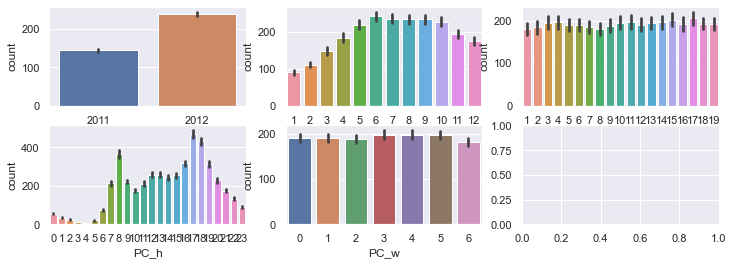

In [343]:
f, axs=plt.subplots(2,3, figsize=(12,4))

sns.barplot(data=train, x='PC_y', y='count', ax=axs[0,0])
sns.barplot(data=train, x='PC_m', y='count', ax=axs[0,1])
sns.barplot(data=train, x='PC_d', y='count', ax=axs[0,2])
sns.barplot(data=train, x='PC_h', y='count', ax=axs[1,0])
sns.barplot(data=train, x='PC_w', y='count', ax=axs[1,1])


In [344]:
# PC 일일히 쓰기 귀찮다

# 방법 1: print(train.columns.tolist()) 하고 긁기
# 방법 2: in 하면 될줄 알았는데 아니다
# print("PC" in train.columns.tolist())

# 좀 귀찮지만 내 방법
PC_list=[col for col in train.columns.tolist() if "PC" in col]
# for col in train.columns.tolist():
#     if "PC" in col:
#         PC_list.append(col)
    
print(PC_list)

['PC_y', 'PC_m', 'PC_d', 'PC_h', 'PC_w']


* 주말~평일 : 차이 무의미
* 날씨 : 5~10월이 피크
* 시간 : 7 ~ 9시, 17 ~ 18시 --> 출퇴금, 통학용 주로 이용될 듯 하다

<pre>
평일/휴일
holiday
workingday
-> 이 피쳐 이용해서 의미 있나 없나 확인

계절
season
weather
temp
atemp
humidity
windspeed

In [345]:
train[['holiday', 'workingday']].value_counts()

holiday  workingday
0        1             7412
         0             3163
1        0              311
dtype: int64

In [346]:
pd.crosstab(train['holiday'], train['workingday'])

workingday,0,1
holiday,,
0,3163,7412
1,311,0


<AxesSubplot:xlabel='workingday', ylabel='count'>

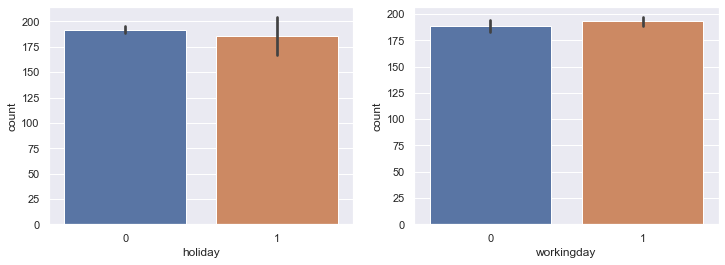

In [347]:
f, axs=plt.subplots(1,2, figsize=(12,4))

sns.barplot(x=train['holiday'], y=train['count'], ax=axs[0])
sns.barplot(x=train['workingday'], y=train['count'], ax=axs[1])

In [348]:
train[['holiday', 'workingday']].corr()

,holiday,workingday
holiday,1.000000,-0.250491
workingday,-0.250491,1.000000


In [349]:
train[(train['holiday']==0) & (train['workingday']==1)]['PC_w'].value_counts()

3    1553
1    1539
2    1527
4    1481
0    1312
Name: PC_w, dtype: int64

In [350]:
train[(train['holiday']==0) & (train['workingday']==0)]['PC_w'].value_counts()

5    1584
6    1579
Name: PC_w, dtype: int64

In [351]:
train[(train['holiday']==1)]['PC_w'].value_counts()

0    239
4     48
2     24
Name: PC_w, dtype: int64

In [352]:
train[['holiday', 'workingday', 'PC_w']].value_counts() #로 하면 더 간단
# workingday 주중 아니다

# holiday 1이면서 workingday 0 이면 tax_day, thanksgiving friday, 이런 거래
# 우리 생각으로는 둘이 대비되어야 하는데 0,0이 나옴 -> 그러면 outlier 라고 생각하는데 배경지식 이해하면 정상적

holiday  workingday  PC_w
0        0           5       1584
                     6       1579
         1           3       1553
                     1       1539
                     2       1527
                     4       1481
                     0       1312
1        0           0        239
                     4         48
                     2         24
dtype: int64

* season, PC_m : 다중공선 확인 필요

In [353]:
train[['PC_m', 'season']].value_counts().sort_index()

PC_m  season
1     1         884
2     1         901
3     1         901
4     2         909
5     2         912
6     2         912
7     3         912
8     3         912
9     3         909
10    4         911
11    4         911
12    4         912
dtype: int64

* weather, temp, atemp, humidity, windspeed

In [354]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

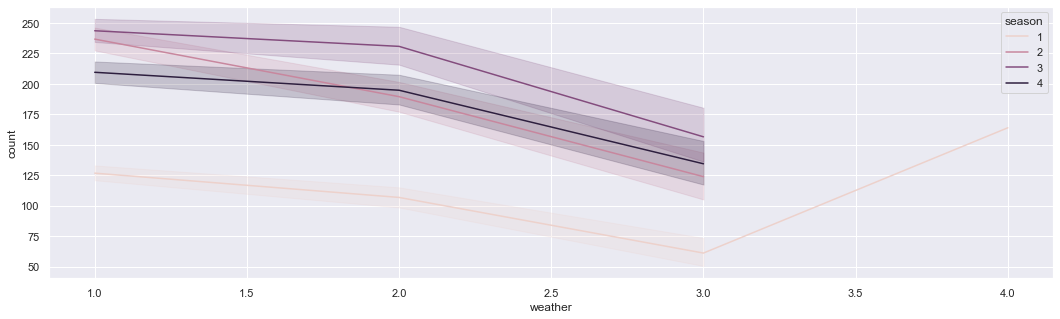

In [355]:
sns.lineplot(x='weather', y='count', hue='season', data=train)

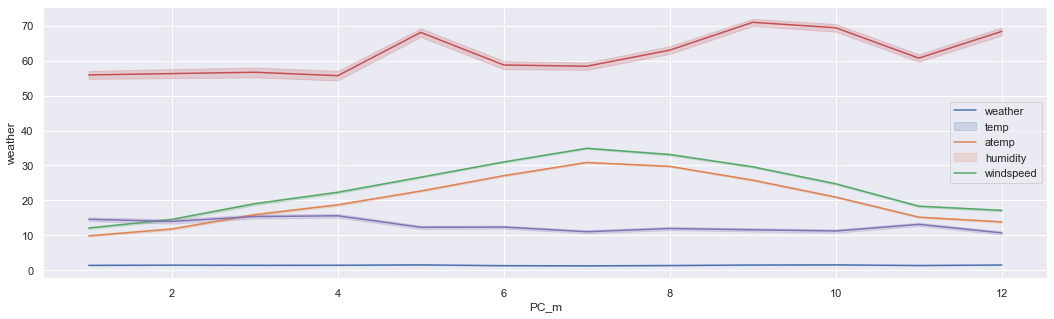

In [356]:

# sns.lineplot(x=train.index, y="temp",
#              data=train)
# sns.lineplot(x=train.index, y="humidity",
#              data=train)
# sns.lineplot(x=train.index, y="windspeed",
#              data=train)


sns.lineplot(x="PC_m", y="weather",
             data=train)
sns.lineplot(x="PC_m", y="temp",
             data=train)
sns.lineplot(x="PC_m", y="atemp",
             data=train)
sns.lineplot(x="PC_m", y="humidity",
             data=train)
sns.lineplot(x="PC_m", y="windspeed",
             data=train)
plt.legend(labels=["weather","temp", "atemp", "humidity"  ,"windspeed"])

plt.show()

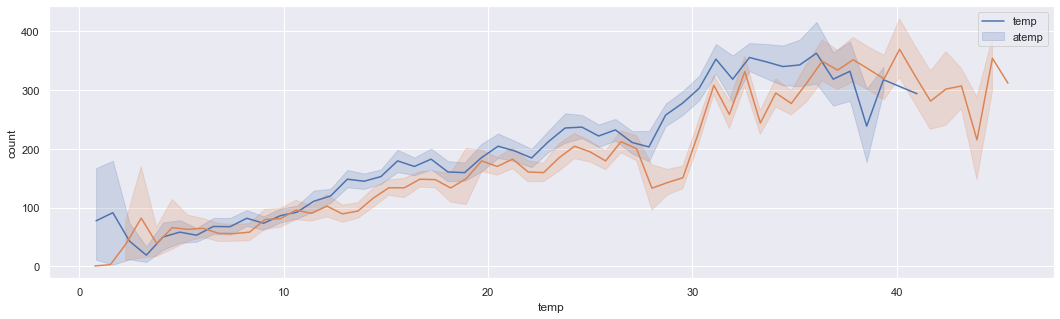

In [357]:
sns.lineplot(x="temp", y="count",
             data=train)

sns.lineplot(x="atemp", y="count",
             data=train)
plt.legend(labels=["temp", "atemp"])

<AxesSubplot:xlabel='humidity', ylabel='count'>

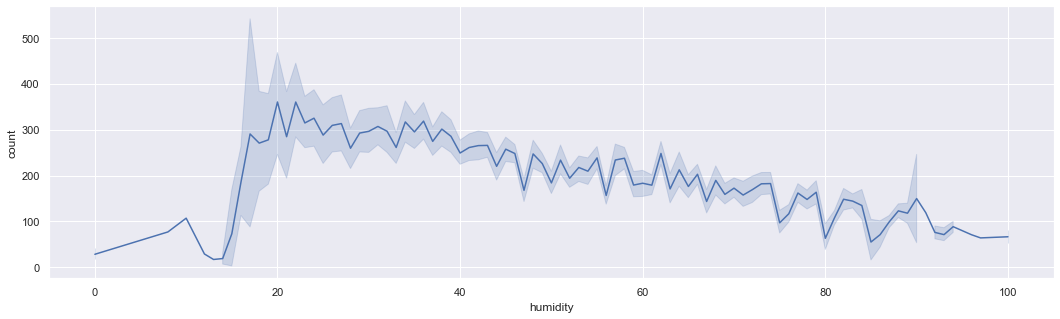

In [358]:
sns.lineplot(x="humidity", y="count",
             data=train)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

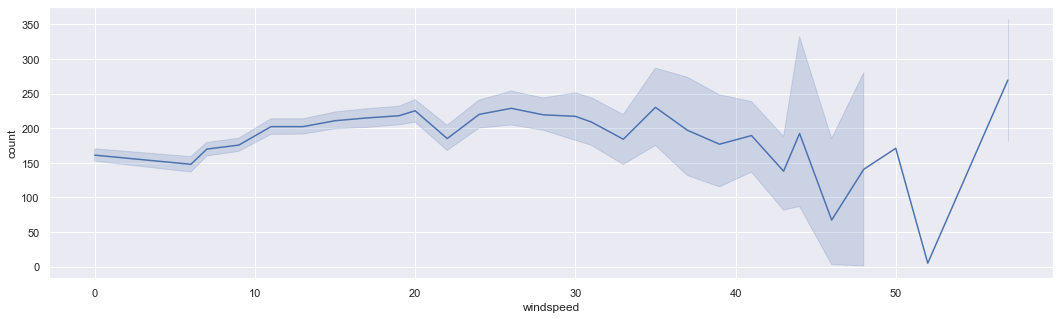

In [359]:
sns.lineplot(x="windspeed", y="count",
             data=train)

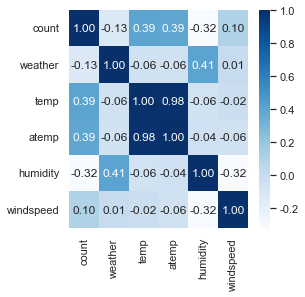

In [360]:
plt.figure(figsize=(4,4))
sns.heatmap(train[['count',"weather","temp", "atemp", "humidity"  ,"windspeed"]].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

<pre>
-> 도메인 상식 깬다? 확인 필요

* temp, atemp : 다중공선성
* 의외로 weather랑 count 관계 낮다 -> 확인 필요(-0.13)  ---> weather 아웃라이어 처리 안 함
* 왜 windspeed와 weather 관계 없나? -> 뭔가 이상(0.01)  ---> 0데이터처리필요
* weather - humidity : 0.41 약한 상관관계 ㅇㅇ 확인 안 해도 될듯

<AxesSubplot:xlabel='windspeed', ylabel='count'>

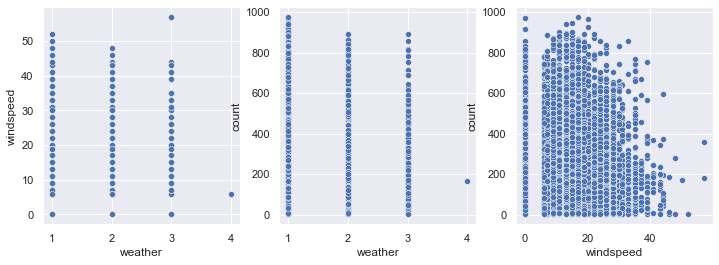

In [361]:
f, axes = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(x='weather', y='windspeed', data=train, ax=axes[0])
sns.scatterplot(x='weather', y='count', data=train, ax=axes[1]) # 혼자 4인 애 때문에 그랬구나(?) 그래도 아웃라이어라고 함부로 버리면 안 됨
sns.scatterplot(x='windspeed', y='count', data=train, ax=axes[2]) # windspeed가 0????????????? -> 결측을 0으로 한 게 아닐까


## 대여수

* casual -> 대여수
* registered ->대여수
* count

In [362]:
train[['casual' , 'registered', 'count']].head() # 왠지 합같다

,casual,registered,count
regtime,,,
2011-01-01 00:00:00,3,13,16
2011-01-01 01:00:00,8,32,40
2011-01-01 02:00:00,5,27,32
2011-01-01 03:00:00,3,10,13
2011-01-01 04:00:00,0,1,1


In [363]:
train[train['count'] != train['casual']+train['registered']].value_counts()
# test는 count 없어서 확인 안 해도 됨

Series([], dtype: int64)

In [364]:
# 불필요 컬럼 삭제

In [365]:
train=train.drop(['casual', 'registered'], axis=1)
train=train.drop(['temp'], axis=1)

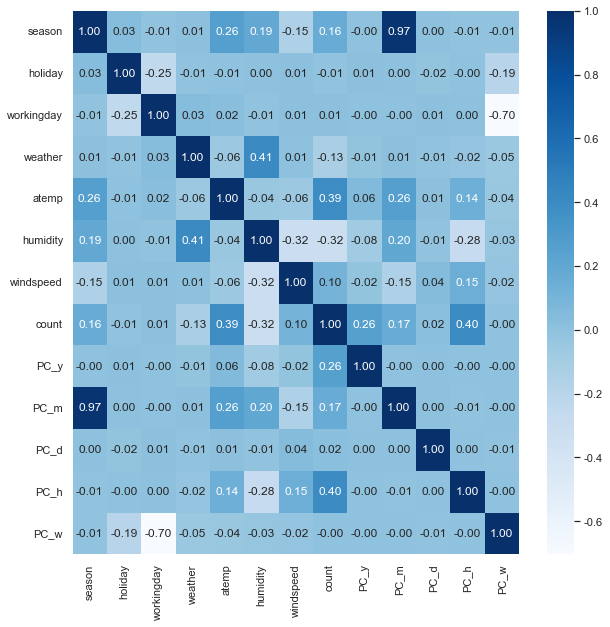

In [366]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 삭제피쳐

PC_m - season 심각한다중공선
* 러프하게 갈 거냐 상세하게 갈 거냐에 따라 drop할 거 고르기
* 사실 둘 다 count랑 0.16, 0.17이라 별루 -> 그래도 얘는 linear관계만을 보니까 모델 돌려서 featue importance 보고 결정

PC_w - workingday(애매)

# 본격적 가공

## windspeed

In [367]:
train['windspeed'].value_counts().sort_index()

0.0000     1313
6.0032      872
7.0015     1034
8.9981     1120
11.0014    1057
12.9980    1042
15.0013     961
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
36.9974      22
39.0007      27
40.9973      11
43.0006      12
43.9989       8
46.0022       3
47.9988       2
50.0021       1
51.9987       1
56.9969       2
Name: windspeed, dtype: int64

In [368]:
# 방법 1. 0 -> null로 바꾸고 fillna
# 근데 뭘료?? -> target을 windspeed로 두고 windspeed 없는 건 test로 있는 건 train으로 하고 새로운 추정치 구하기

In [369]:
train[train['windspeed']==0.0].shape
# train[train['windspeed']!=0.0].shape

(1313, 13)

In [370]:
print((train[train['windspeed']==0.0].shape[0])/(train.shape[0]))
print((train[train['windspeed']!=0.0].shape[0])/(train.shape[0]))

0.12061363218813155
0.8793863678118684


In [371]:
# KNN, RFR, ....
model=KNeighborsRegressor()

windspeed_X_train=train[train['windspeed']!=0.0].drop(['windspeed','count'], axis=1) # 9573건
windspeed_y_train=train[train['windspeed']!=0.0]['windspeed']

windspeed_X_test=train[train['windspeed']==0.0].drop(['windspeed','count'], axis=1)  # 1313건

model.fit(windspeed_X_train, windspeed_y_train)

windspeed_pred=model.predict(windspeed_X_test) # 1313건에 해당하는 0값을 -> pred 값으로 대체



train.loc[train['windspeed']==0,'windspeed']=pd.Series(windspeed_pred, index=windspeed_X_test.index)

# windspeed는 정수도 round 한 것도 아닌데 소수점 자리 같은 애들 왜 뭉쳐있지 뭘로 묶은 건가

In [372]:
train[train['windspeed']==0]

,season,holiday,workingday,weather,atemp,humidity,windspeed,count,PC_y,PC_m,PC_d,PC_h,PC_w
regtime,,,,,,,,,,,,,


<AxesSubplot:xlabel='windspeed', ylabel='count'>

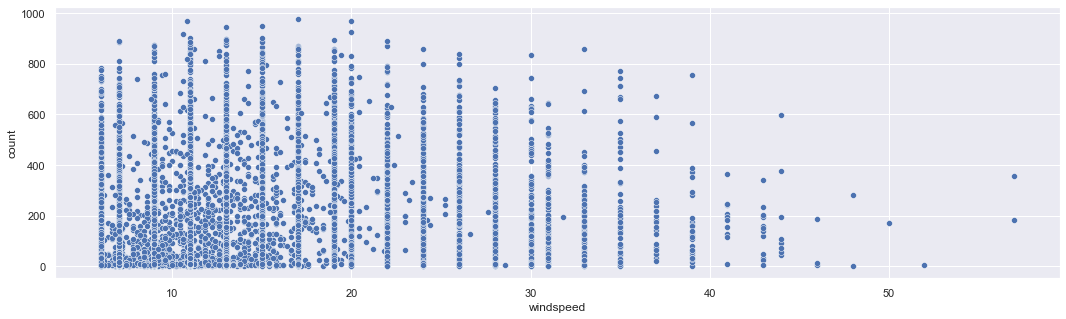

In [373]:
sns.scatterplot(x=train['windspeed'], y=train['count'])

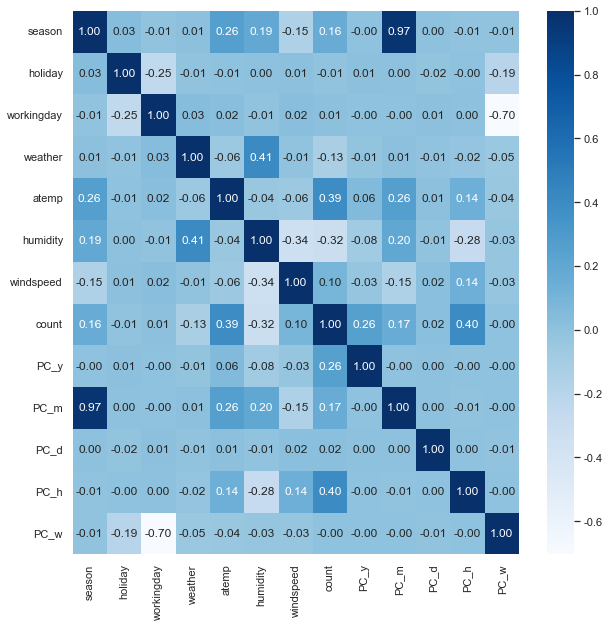

In [374]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [375]:
train.columns.tolist()

['season',
 'holiday',
 'workingday',
 'weather',
 'atemp',
 'humidity',
 'windspeed',
 'count',
 'PC_y',
 'PC_m',
 'PC_d',
 'PC_h',
 'PC_w']

In [376]:
# # 강사님 코드--------------******************************
# # 아주 중요한 피쳐가 결측 있으면 이거 채우려고 다른 피쳐 이용한다. (현업에서 많이 쓴다.)

# # KNN, RFR, ....
# col_list=['season','weather','atemp','humidity','PC_y','PC_m','PC_d','PC_h'] # 어떤 걸로 windspeed 예측값 넣을 건지 컬럼 지정

# # drop으로 count 떼면 test에도 똑같이 할 때 안 된다.

# windspeed_X_train=train[train['windspeed']!=0.0][col_list] # 9573건
# windspeed_y_train=train[train['windspeed']!=0.0]['windspeed']

# windspeed_X_test=train[train['windspeed']==0.0][col_list]  # 1313건

# windspeed_model=RandomForestRegressor()
# windspeed_model.fit(windspeed_X_train, windspeed_y_train)

# windspeed_pred=model.predict(windspeed_X_test) # 1313건에 해당하는 0값을 -> pred 값으로 대체

# #-------------
# train.loc[train['windspeed']==0,'windspeed']=windspeed_pred.reshape(-1,1) # Series로 안 하고 세로줄로 세워서 이렇게 해도 된다.(데이터 섞은 적 없어서)

## weather
* 의외로 weather랑 count 관계 낮다 -> 확인 필요(-0.13)
* 왜 windspeed와 weather 관계 없나? -> 뭔가 이상(0.01)

# 모델 학습 & 평가 & 검증

* train 8 : val 2
* model.fit() model.predict(val 이용함) --> score(val2) y_val 답안지 이용
* model확정: test_pred=model.predict(원래 test)   --> score XXX 리더보드에 올려야 준다.
* test_pred --> 내가 test문제를 확정 model로 풀어서 test_pred 답안을 submission.csv에 넣으면 된다.